In [2]:
# import dependencies
import os
import pandas as pd

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns


In [601]:
# define relevant paths
home_path = os.path.dirname(os.getcwd())
data_path = home_path + '\\data\\'
plot_path = home_path + '\\plots\\projections\\'

In [637]:
# get merged data
data = pd.read_csv(
    data_path + 'data_merged.csv',
    header=[0, 1],
    index_col=0
)

# convert index col to datetime
data.index = pd.to_datetime(data.index.values)

# filter out all data before february
data['date'] = data.index
data = data[data.date.apply(lambda d: d.date().isoformat() > '2023-01-31')]

# create multiIndex f. dates w.r.t. month, day, hour 
data.index = pd.MultiIndex.from_tuples(data.date.apply(lambda d: (d.month, d.day, d.hour, d.date().isoformat())))

# remove date col
#del data['date']

# remove NANs (some 30-ish for flow varaibles)
data = data.dropna()

In [638]:
# define X vars
x_vars = [
    ('pressure', 'TA01_GP101'),
    #('pressure', 'FF01_GP101'),
    ('pressure', 'DC_GP101'),
    ('pressure', 'SMHI'),
    ('flow', 'TA01_GP101_default'),
    #('flow', 'FF01_GP101_default'),
    ('temperatures', 'DC_GT401_GM401'),
    ('temperatures', 'TA01_GT10X_GM10X'),
    ('temperatures', 'DC_GT301_damped'),
    ('temperatures', 'DC_GT301_outdoor'),
    ('temperatures', 'SMHI'),
    ('temperatures', 'SMHI_dewp')
]


In [639]:
# extract numeric vals
X = data[x_vars].values

In [640]:
# deifne PCA module
pca = PCA(
    n_components=None,
    whiten=True,
    svd_solver='auto'
)

# project data onto PCs
X_proj = pca.fit_transform(X)

In [641]:
# add 2D projected data to D
data['pc_1'] = X_proj[:, 0]
data['pc_2'] = X_proj[:, 1]

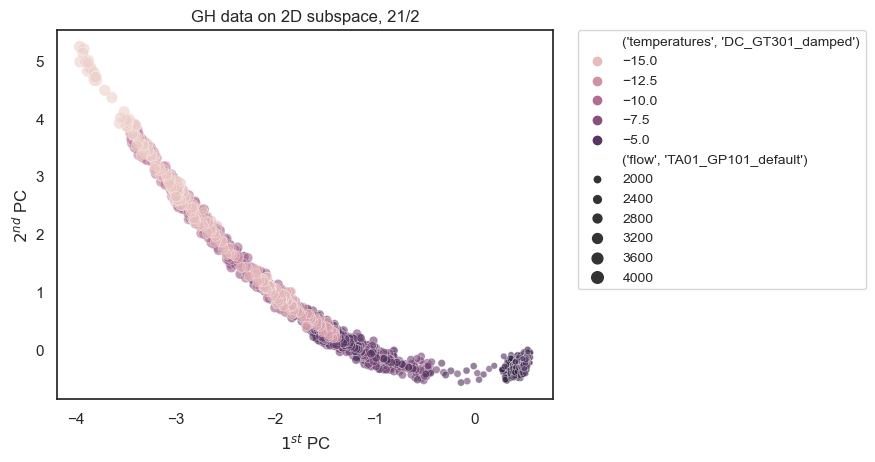

In [647]:
# set plot theme
sns.set_theme()
sns.set_style('white')

# define date
day = (2, 21)

# make scatterplot
sns.scatterplot(
    data=data.loc[day],
    x = 'pc_1',
    y = 'pc_2',
    size = ('flow', 'TA01_GP101_default'),
    hue = ('temperatures', 'DC_GT301_damped'),
    #hue = ('temperatures', 'TA01_GT10X_GM10X'),
    #legend=None,
    alpha=0.6
)

# fix plt labels
plt.xlabel('$1^{st}$ PC')
plt.ylabel('$2^{nd}$ PC')

# fix legend
plt.legend(
    title='',
    bbox_to_anchor=(1.05, 1), 
    loc='upper left', 
    borderaxespad=0,
    fontsize='small'
)

# fix title
plt.title('GH data on 2D subspace, {}/{}'.format(day[-1], day[0]))

# save and show fig
fpath = plot_path + '{}-{}.png'.format(day[-1], day[0])
plt.savefig(fpath, bbox_inches='tight', dpi=500)
plt.show()